# Лабораторна робота № 2
## Використання Pandas для аналізу даних
## Мета: Вивчення основних функцій Pandas для аналізу даних.

## Формула визначення варіанту

In [1]:
N = (16 + 4 ) % 5 + 1
N

1

## 1. Виведіть перші 8 рядків набору даних.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
file_path = 'NationalNames.csv'
data = pd.read_csv(file_path)
data.head(8)

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
5,6,Margaret,1880,F,1578
6,7,Ida,1880,F,1472
7,8,Alice,1880,F,1414


## 2. Вивести останні 8 рядків набору даних.

In [3]:
data.tail(8)

,Id,Name,Year,Gender,Count
1825425,1825426,Zo,2014,M,5
1825426,1825427,Zyeir,2014,M,5
1825427,1825428,Zyel,2014,M,5
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5
1825432,1825433,Zyrin,2014,M,5


## 3. Отримайте імена стовпців набору даних

In [4]:
data.columns

Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')

## 5. Знайдіть кількість унікальних імен у наборі даних

In [5]:
data['Name'].nunique()

93889

## 10. Підрахуйте кількість унікальних імен у кожному році

In [6]:
data.groupby('Year')[['Name']].nunique()

,Name
Year,
1880,1889
1881,1830
1882,2012
1883,1962
1884,2158
...,...
2010,31603
2011,31418
2012,31236


## 11. Знайдіть рік із найбільшою кількістю унікальних імен.

In [7]:
names_per_year = data.groupby('Year')[['Name']].nunique()
year_with_max_names = names_per_year.loc[[names_per_year['Name'].idxmax()]]
year_with_max_names

,Name
Year,
2008,32488


## 12. Знайдіть найпопулярніше ім’я в році з найбільшою кількістю унікальних імен (тобто у 2008 році)

In [8]:
data_2008 = data[data['Year'] == 2008]
most_frequent_name_2008 = data_2008.groupby('Name')['Count'].sum().idxmax()
most_frequent_name_2008

'Jacob'

## 13. Знайдіть рік, коли ім’я “Jacob” було найпопулярнішим серед жіночих імен

In [9]:
most_popular_jacob_year = data[(data['Name'] == 'Jacob') & (data['Gender'] == 'F')].nlargest(1, 'Count')
most_popular_jacob_year[['Id', 'Name', 'Year', 'Gender', 'Count']]

,Id,Name,Year,Gender,Count
1455556,1455557,Jacob,2004,F,171


## 14. Знайти рік із найбільшою кількістю гендерно нейтральних імен (однакові чоловічі та жіночі імена)


In [10]:
gender_neutral_names = data.groupby(['Name', 'Year'])['Gender'].nunique()
neutral_years = gender_neutral_names[gender_neutral_names == 2].reset_index()
neutral_counts = neutral_years.groupby('Year').size().reset_index(name='Gender_neutral_names')
result = neutral_counts.loc[neutral_counts['Gender_neutral_names'].idxmax()].to_frame().T.set_index('Year')
result

,Gender_neutral_names
Year,
2008,2557


## 15. Знайдіть загальну кількість народжень за рік.

In [11]:
total_births_per_year = data.groupby('Year')['Count'].sum().reset_index(name='Total_Births')
total_births_per_year.head()

,Year,Total_Births
0,1880,201484
1,1881,192699
2,1882,221538
3,1883,216950
4,1884,243467


## 16. Знайдіть рік, коли народилося найбільше дітей

In [12]:
max_birth_year = data.groupby('Year')['Count'].sum().idxmax()
max_birth_year

1957

## 17. Знайдіть кількість дівчаток та хлопчиків, які народились кожного року

In [13]:
births_by_gender_per_year = data.groupby(['Year', 'Gender'])['Count'].sum().unstack(fill_value=0).reset_index()
births_by_gender_per_year.head()

Gender,Year,F,M
0,1880,90993,110491
1,1881,91954,100745
2,1882,107850,113688
3,1883,112321,104629
4,1884,129022,114445


## 18. Підрахуйте кількість років, коли дівчаток народжувалось більше, ніж хлопчиків.

In [14]:
gender_comparison = births_by_gender_per_year['F'] > births_by_gender_per_year['M']
count_years_more_girls = gender_comparison.sum()
count_years_more_girls

54

## 21. Порахуйте, скільки разів хлопчиків називали Barbara

In [15]:
boys_named_barbara = data[(data['Name'] == 'Barbara') & (data['Gender'] == 'M')]['Count'].sum()
boys_named_barbara

4139

## 22. Підрахуйте скільки років проводилось спостереження

In [16]:
years_observed = data['Year'].nunique()
f"Спостереження проводились {years_observed} років"

'Спостереження проводились 135 років'

## 23. Знати найпопулярніші гендерно-нейтральні імена (ті, що присутні кожного року)


In [17]:
names_by_gender = data.groupby(['Name', 'Gender'])['Count'].sum().unstack(fill_value=0)
neutral_names = names_by_gender[(names_by_gender['F'] > 0) & (names_by_gender['M'] > 0)].copy()
neutral_names['Total'] = neutral_names['F'] + neutral_names['M']
top_neutral_names = neutral_names.sort_values(by='Total', ascending=False)
top_neutral_names

Gender,F,M,Total
Name,,,
James,23177,5105919,5129096
John,21647,5084943,5106590
Robert,20090,4796695,4816785
Michael,21607,4309198,4330805
Mary,4115282,15159,4130441
...,...,...,...
Bonell,5,5,10
Camlin,5,5,10
Wilmeth,5,5,10


## 24. Знайти найпопулярніше серед непопулярних імен (непопулярне ім’я, яким називали дітей найбільшу кількість разів )

In [18]:
name_counts = data.groupby('Name')['Count'].sum()
unpopular_names = name_counts[name_counts < 161]  # Імена, які зустрічаються менше ніж 161 разів
most_popular_unpopular_name = unpopular_names.idxmax()  # Ім'я з найбільшою кількістю серед непопулярних
most_popular_unpopular_name_count = unpopular_names.max()  # Кількість народжень для цього імені
print(f"Найбільш популярне із непопулярних імен - це {most_popular_unpopular_name}. Ним називали {most_popular_unpopular_name_count} разів.")

Найбільш популярне із непопулярних імен - це Adriyana. Ним називали 160 разів.


## 26. Побудувати графіки розподілення кількості жіночих імен John та чоловічих імен Mary по роках.


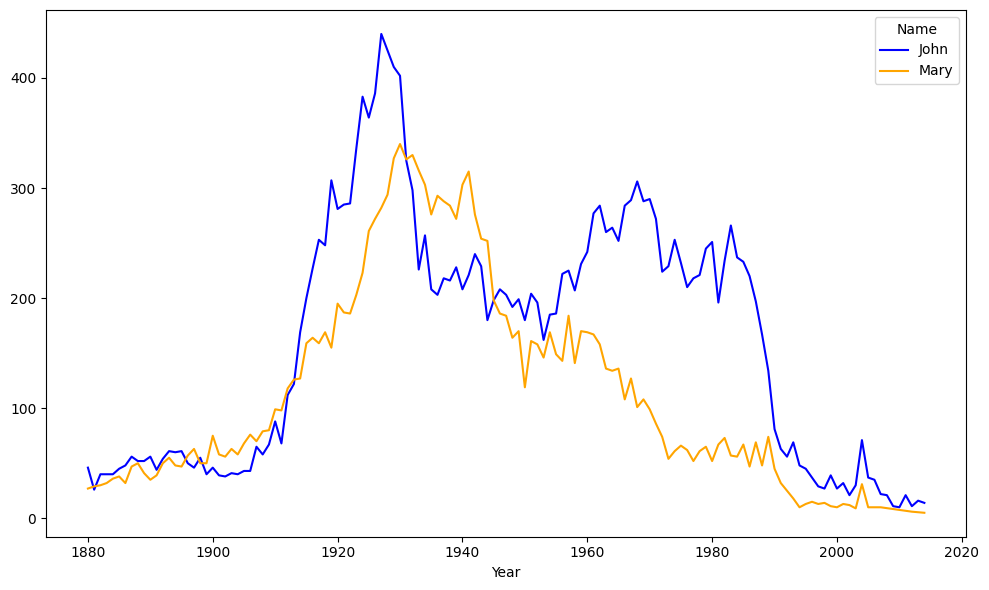

In [19]:
import matplotlib.pyplot as plt
john_female = data[(data['Name'] == 'John') & (data['Gender'] == 'F')]
mary_male = data[(data['Name'] == 'Mary') & (data['Gender'] == 'M')]
plt.figure(figsize=(10, 6))
plt.plot(john_female['Year'], john_female['Count'], color='blue', label='John')
plt.plot(mary_male['Year'], mary_male['Count'], color='orange', label='Mary')
plt.xlabel('Year')
plt.legend(title='Name')
plt.tight_layout()
plt.show()